# Problem and Objectives
The majority of the world's trade transacts in the US dollar, positioning the United States to control the world's economies. So whatever happens in USA US stock indexes, naturally influences or affects other nations' indices.
It's crucial to historically map how the US market behaved during crucial events that are War, Recession, coronavirus, etc.

My Objective is to find out: 
1) How the indices (India's Nifty & US's Nasdaq) performed during the crucial Events.
2) Checking the Correlation between Nasdaq and Nifty
3) Calculating the performance of both indexes post the crucial event for the next one quarter

## Istalling and Importing Libraries

In [124]:
!pip install pandas
!pip install numpy
!pip install matplotlib

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print ('All libraries imported')

All libraries imported


## Loading the CSV Files and cleaning the data

In [126]:
# Load Nasdaq and Nifty data from CSV files
nasdaq_data = pd.read_csv("nasdaq.csv", parse_dates=['Date'])
nifty_data = pd.read_csv("nifty.csv", parse_dates=['Date'])
print ('both files are loaded')

both files are loaded


In [127]:
# Check for null values
nasdaq_data.isnull().sum()
nifty_data.isnull().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

In [128]:
# Drop rows with null values or fill them based on your strategy
nasdaq_data = nasdaq_data.dropna()
nifty_data = nifty_data.dropna()

In [129]:
nifty_data. head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [130]:
nasdaq_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


## Identifying the Impacful events and filtering the data

In [131]:
# Identify impactful events (wars, recession, and COVID-19)
important_dates = [
    {'start_date': '1987-10-19', 'end_date': '1987-10-20', 'event': 'Black Monday'},
    {'start_date': '2000-03-01', 'end_date': '2001-03-01', 'event':'Dot-Com Bubble Burst'},
    {'start_date': '2001-09-11', 'end_date': '2001-09-17', 'event':'9/11 Attacks'},
    {'start_date': '2008-09-15', 'end_date': '2009-06-01', 'event':'Financial Crisis'},
    {'start_date': '2012-05-06', 'end_date': '2012-05-07', 'event':'Flash Crash'},
    {'start_date': '2016-06-23', 'end_date': '2016-06-30', 'event':'Brexit'},
    {'start_date': '2020-02-05', 'end_date': '2020-04-04', 'event':'COVID-19 Pandemic'},
    {'start_date': '2021-10-01', 'end_date': '2022-07-01', 'event':'Inflation Concerns'},
    {'start_date': '2022-02-23', 'end_date': '2022-04-23', 'event':'Russian-Ukraine War'},
    {'start_date': '2023-10-07', 'end_date': '2023-11-01', 'event':'Israel-Hamas War'}
    ]


In [132]:
# Filter data for important dates
nasdaq_imp = pd.concat([nasdaq_data[(nasdaq_data['Date'] >= pd.to_datetime(date['start_date'])) &
                                   (nasdaq_data['Date'] <= pd.to_datetime(date['end_date']))] for date in important_dates])

nifty_imp = pd.concat([nifty_data[(nifty_data['Date'] >= pd.to_datetime(date['start_date'])) &
                                 (nifty_data['Date'] <= pd.to_datetime(date['end_date']))] for date in important_dates])
print ('data has been filtered for important dates')

data has been filtered for important dates


# Visualisation
## A simple line Chart
Nifty's data available from 2007 to 2023
Nasdaq's data available from 1971 to 2023

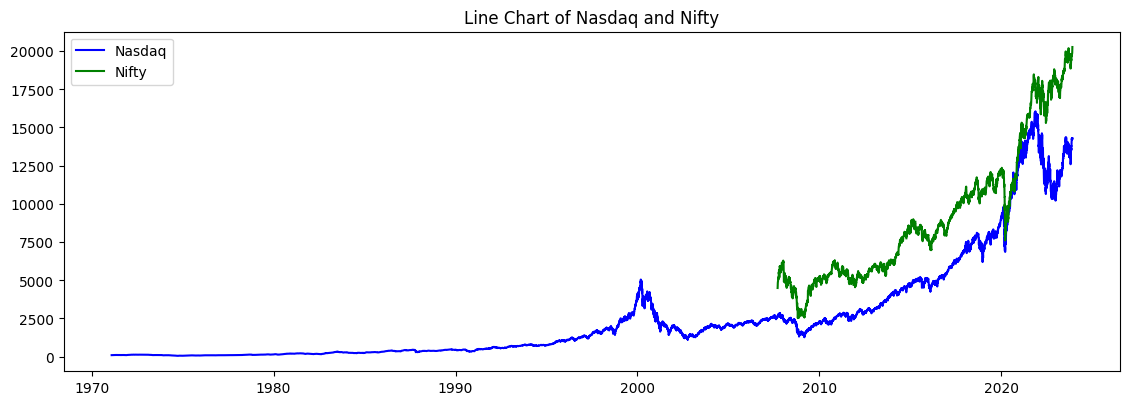

In [65]:
# Plotting
plt.figure(figsize=(30, 15))

# Line chart of both indexes trends
plt.subplot(3, 2, 1)
plt.plot(nasdaq_data['Date'], nasdaq_data['Close'], label='Nasdaq', color='blue')
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Nifty', color='green')
plt.title('Line Chart of Nasdaq and Nifty')
plt.legend()

## Faceted Area Chart with Important Dates

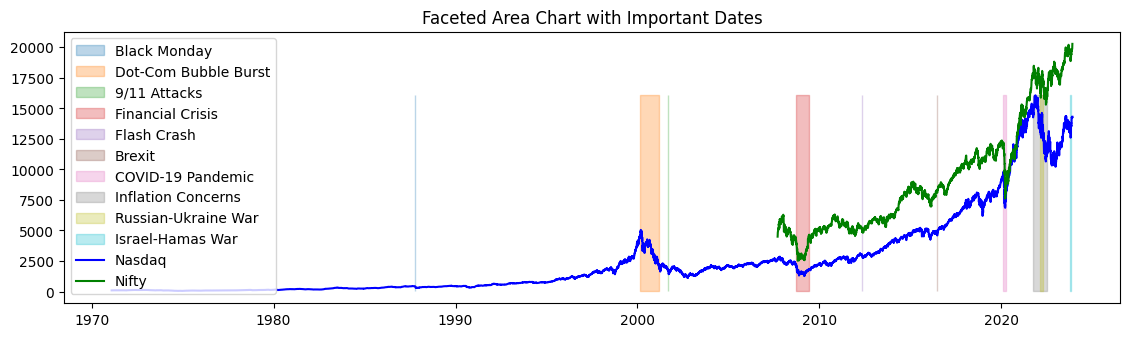

In [133]:
# Increase chart size
plt.figure(figsize=(30, 12))

# Faceted area chart with respect to important dates
plt.subplot(3, 2, 2)
for i, date in enumerate(important_dates):
    color = plt.cm.tab10(i)  # Use a different color for each event
    plt.fill_betweenx(y=[nasdaq_data['Close'].min(), nasdaq_data['Close'].max()],
                      x1=pd.to_datetime(date['start_date']), x2=pd.to_datetime(date['end_date']),
                      color=color, alpha=0.3, label=date['event'])

plt.plot(nasdaq_data['Date'], nasdaq_data['Close'], label='Nasdaq', color='blue')
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Nifty', color='green')
plt.title('Faceted Area Chart with Important Dates')
plt.legend()

> We can notice that during the start date of every event, there is a significant drop in both Index prices.


## Moving Averages and Volatility level for both indexes

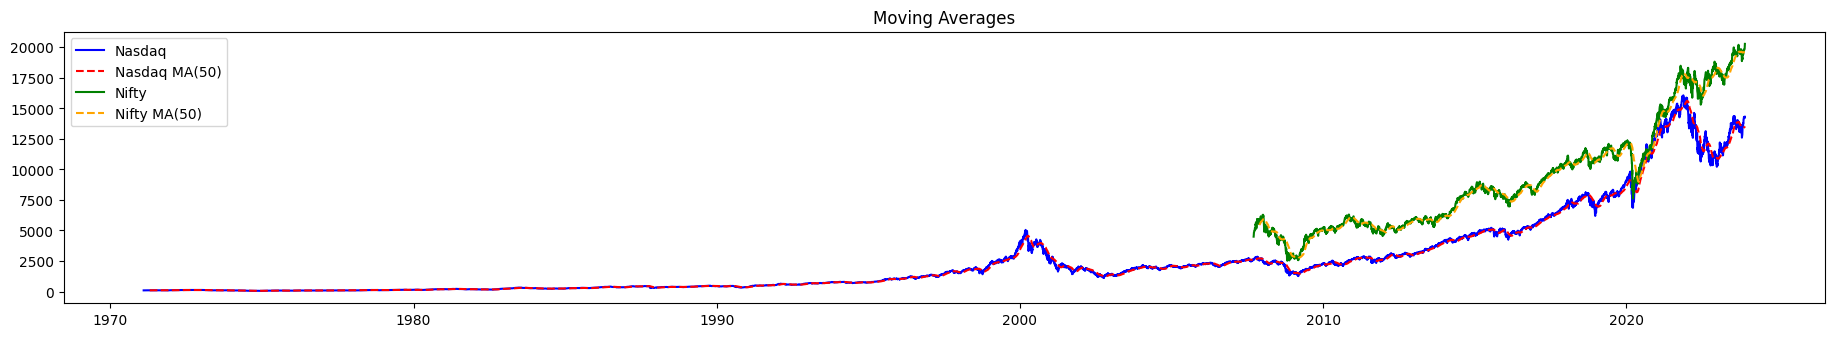

In [134]:
# Increase chart size
plt.figure(figsize=(50, 12))

# Moving averages
plt.subplot(3, 2, 3)
nasdaq_data['MA_50'] = nasdaq_data['Close'].rolling(window=50).mean()
nifty_data['MA_50'] = nifty_data['Close'].rolling(window=50).mean()
plt.plot(nasdaq_data['Date'], nasdaq_data['Close'], label='Nasdaq', color='blue')
plt.plot(nasdaq_data['Date'], nasdaq_data['MA_50'], label='Nasdaq MA(50)', linestyle='--', color='red')
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Nifty', color='green')
plt.plot(nifty_data['Date'], nifty_data['MA_50'], label='Nifty MA(50)', linestyle='--', color='orange')
plt.title('Moving Averages')
plt.legend()

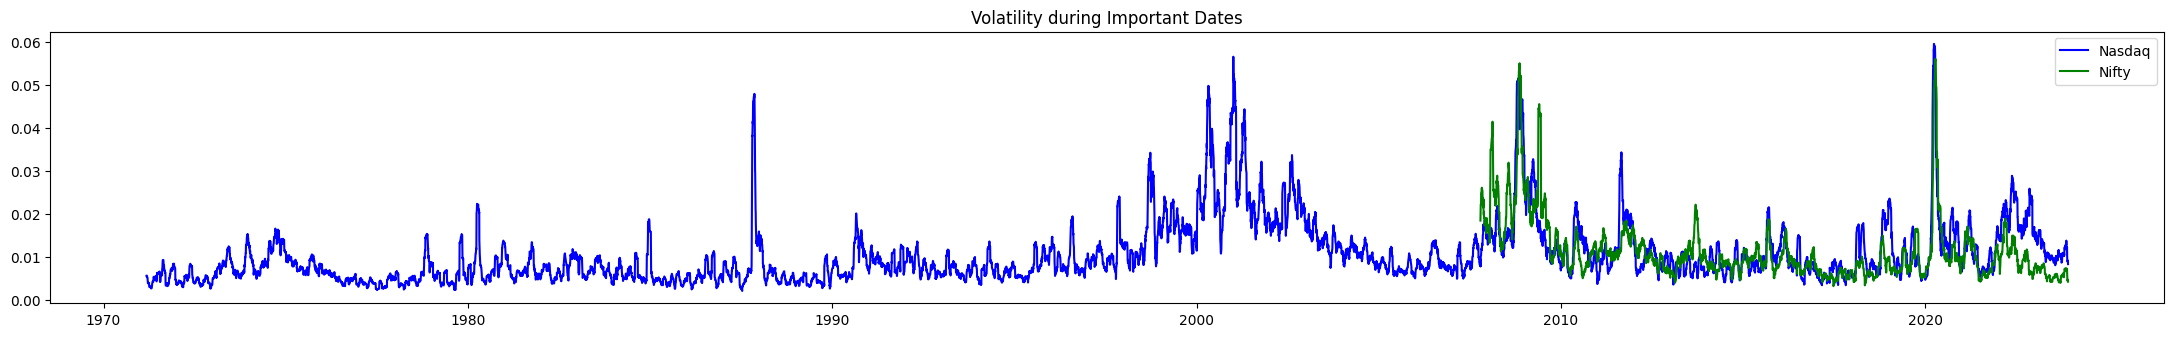

In [135]:
# Increase chart size
plt.figure(figsize=(60, 12))

# Volatility during important dates
plt.subplot(3, 2, 4)
nasdaq_data['Volatility'] = nasdaq_data['Close'].pct_change().rolling(window=20).std()
nifty_data['Volatility'] = nifty_data['Close'].pct_change().rolling(window=20).std()
plt.plot(nasdaq_data['Date'], nasdaq_data['Volatility'], label='Nasdaq', color='blue')
plt.plot(nifty_data['Date'], nifty_data['Volatility'], label='Nifty', color='green')
plt.title('Volatility during Important Dates')
plt.legend()

## Regression Plotting to check corelation between the indexes

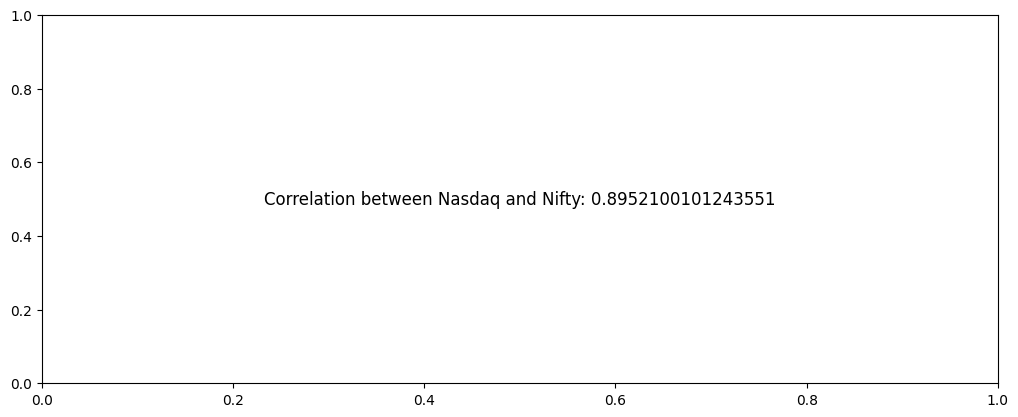

In [136]:
plt.figure(figsize=(20, 12))

# Correlation between both indexes
plt.subplot(3, 2, 5)
correlation = nasdaq_data['Close'].corr(nifty_data['Close'])
plt.text(0.5, 0.5, f"Correlation between Nasdaq and Nifty: {correlation}",
         ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

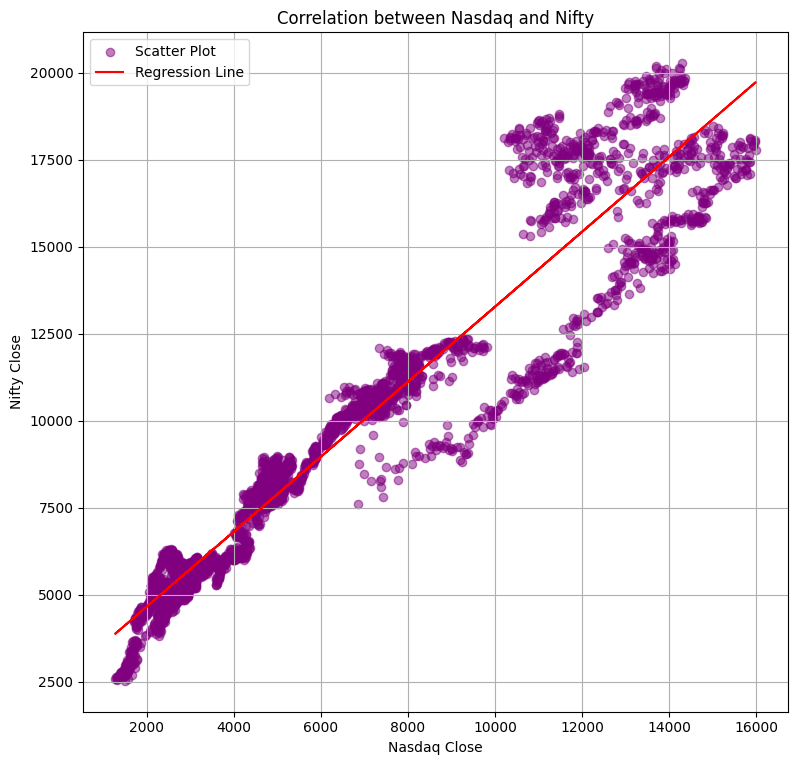

In [137]:
plt.figure(figsize=(20, 30))

# Correlation between both indexes in a regression chart
plt.subplot(3, 2, 5)

# Merge the datasets on the 'Date' column
merged_data = pd.merge(nasdaq_data[['Date', 'Close']], nifty_data[['Date', 'Close']], on='Date', suffixes=('_Nasdaq', '_Nifty'))

# Scatter plot
plt.scatter(merged_data['Close_Nasdaq'], merged_data['Close_Nifty'], label='Scatter Plot', alpha=0.5, color='purple')

# Regression line
z = np.polyfit(merged_data['Close_Nasdaq'], merged_data['Close_Nifty'], 1)
p = np.poly1d(z)
plt.plot(merged_data['Close_Nasdaq'], p(merged_data['Close_Nasdaq']), color='red', label='Regression Line')

plt.title('Correlation between Nasdaq and Nifty')
plt.xlabel('Nasdaq Close')
plt.ylabel('Nifty Close')
plt.grid(True)
plt.legend()

## Plotting the Graph and Table to check Markets performance post the Events for next 3 months.

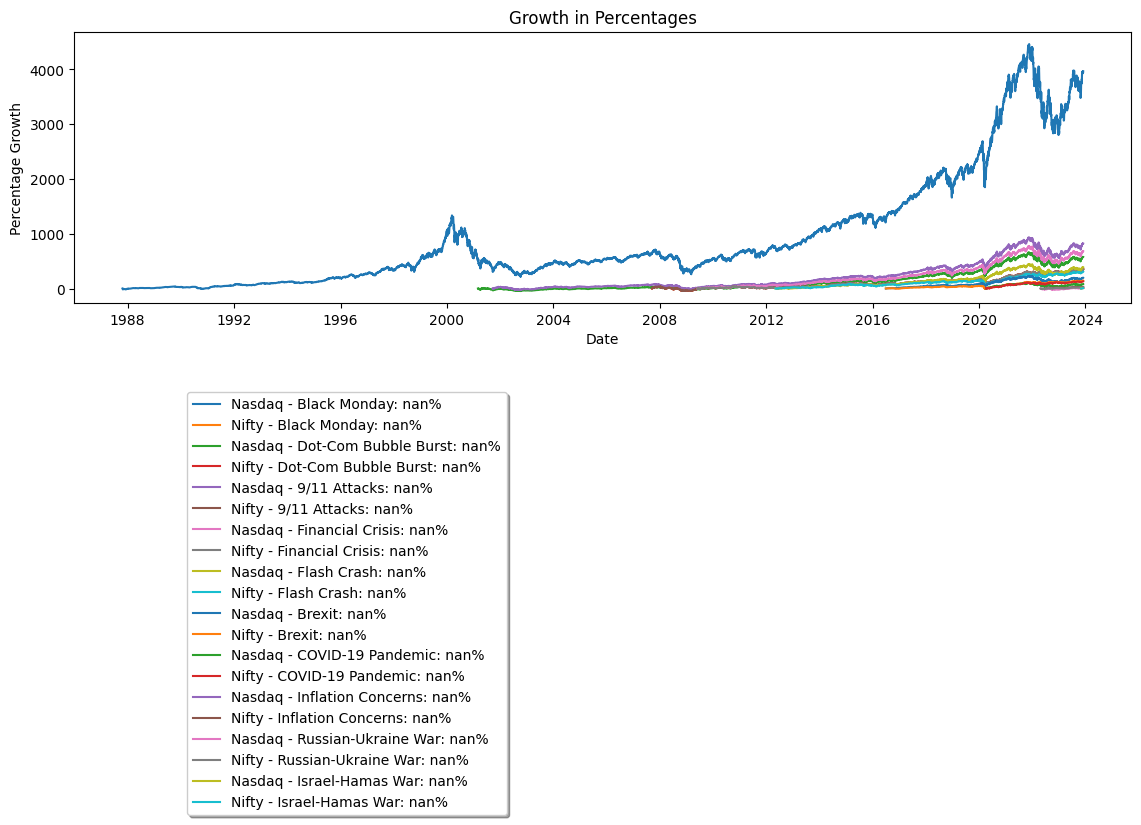

In [138]:
import numpy as np

plt.figure(figsize=(30, 12))

plt.subplot(3, 2, 6)
legend_labels = []
percentage_legend_labels = []

for date in important_dates:
    end_date = pd.to_datetime(date['end_date'])
    growth_data_nasdaq = nasdaq_data[nasdaq_data['Date'] > end_date]
    growth_data_nifty = nifty_data[nifty_data['Date'] > end_date]

    if not growth_data_nasdaq.empty and not growth_data_nifty.empty:
        nasdaq_growth = (growth_data_nasdaq['Close'] / growth_data_nasdaq['Close'].iloc[0] - 1) * 100
        nifty_growth = (growth_data_nifty['Close'] / growth_data_nifty['Close'].iloc[0] - 1) * 100

        plt.plot(growth_data_nasdaq['Date'], nasdaq_growth, label=f"Nasdaq - {date['event']}")
        plt.plot(growth_data_nifty['Date'], nifty_growth, label=f"Nifty - {date['event']}")

        # Calculate percentage growth for the next 3 months
        nasdaq_3_month_growth = ((nasdaq_growth.iloc[-1] / abs(nasdaq_growth.iloc[0])) * 100) if nasdaq_growth.iloc[0] != 0 else np.nan
        nifty_3_month_growth = ((nifty_growth.iloc[-1] / abs(nifty_growth.iloc[0])) * 100) if nifty_growth.iloc[0] != 0 else np.nan

        legend_labels.append(f"Nasdaq - {date['event']}")
        percentage_legend_labels.append(f"Nasdaq - {date['event']}: {nasdaq_3_month_growth:.2f}%")

        legend_labels.append(f"Nifty - {date['event']}")
        percentage_legend_labels.append(f"Nifty - {date['event']}: {nifty_3_month_growth:.2f}%")

plt.title('Growth in Percentages')
plt.xlabel('Date')
plt.ylabel('Percentage Growth')

# Main legend
plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Separate legend for percentage growth
plt.legend(percentage_legend_labels, loc='upper left', bbox_to_anchor=(0.1, -0.3), fancybox=True, shadow=True)

plt.show()


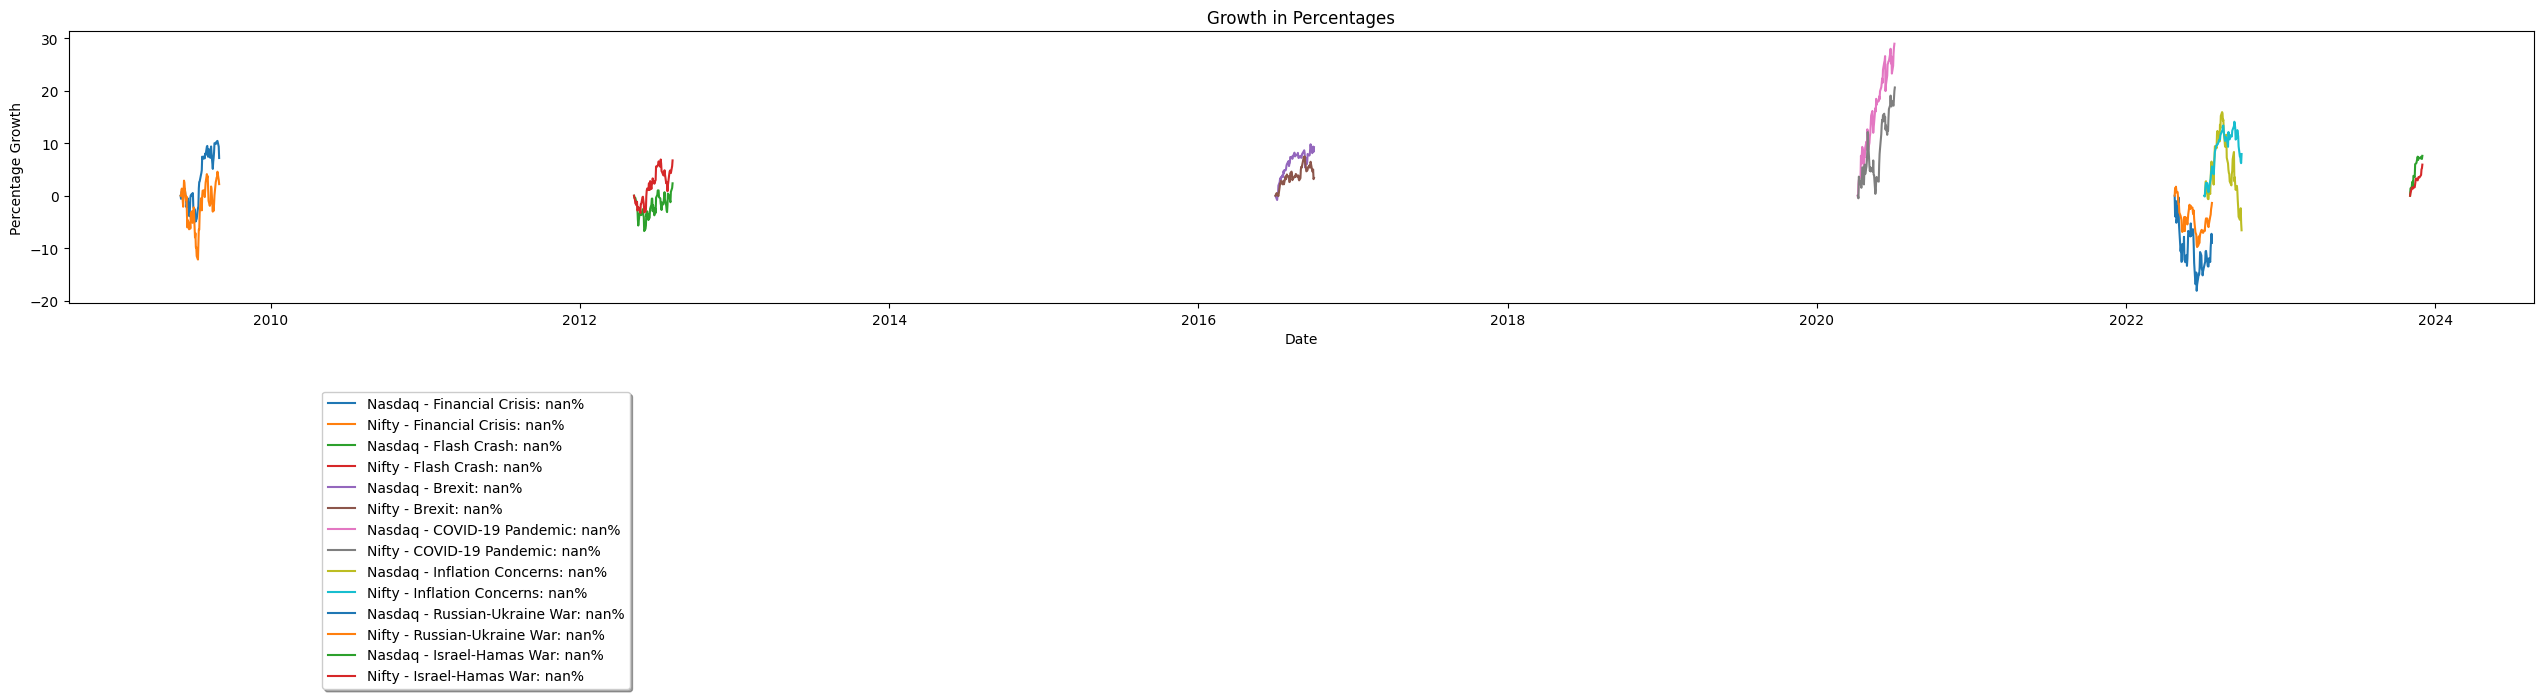

In [149]:
import numpy as np

plt.figure(figsize=(70, 12))

plt.subplot(3, 2, 6)
legend_labels = []
percentage_legend_labels = []

for date in important_dates:
    end_date = pd.to_datetime(date['end_date'])
    three_months_later = end_date + pd.DateOffset(months=3)
    growth_data_nasdaq = nasdaq_data[(nasdaq_data['Date'] > end_date) & (nasdaq_data['Date'] <= three_months_later)]
    growth_data_nifty = nifty_data[(nifty_data['Date'] > end_date) & (nifty_data['Date'] <= three_months_later)]

    if not growth_data_nasdaq.empty and not growth_data_nifty.empty:
        nasdaq_growth = (growth_data_nasdaq['Close'] / growth_data_nasdaq['Close'].iloc[0] - 1) * 100
        nifty_growth = (growth_data_nifty['Close'] / growth_data_nifty['Close'].iloc[0] - 1) * 100

        plt.plot(growth_data_nasdaq['Date'], nasdaq_growth, label=f"Nasdaq - {date['event']}")
        plt.plot(growth_data_nifty['Date'], nifty_growth, label=f"Nifty - {date['event']}")

        # Calculate percentage growth for the next 3 months
        nasdaq_3_month_growth = ((nasdaq_growth.iloc[-1] / abs(nasdaq_growth.iloc[0])) * 100) if nasdaq_growth.iloc[0] != 0 else np.nan
        nifty_3_month_growth = ((nifty_growth.iloc[-1] / abs(nifty_growth.iloc[0])) * 100) if nifty_growth.iloc[0] != 0 else np.nan

        legend_labels.append(f"Nasdaq - {date['event']}")
        percentage_legend_labels.append(f"Nasdaq - {date['event']}: {nasdaq_3_month_growth:.2f}%")

        legend_labels.append(f"Nifty - {date['event']}")
        percentage_legend_labels.append(f"Nifty - {date['event']}: {nifty_3_month_growth:.2f}%")

plt.title('Growth in Percentages')
plt.xlabel('Date')
plt.ylabel('Percentage Growth')

# Main legend
plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Separate legend for percentage growth
plt.legend(percentage_legend_labels, loc='upper left', bbox_to_anchor=(0.1, -0.3), fancybox=True, shadow=True)

plt.show()


In [145]:
import numpy as np

# Lists to store labels for the main legend and percentage legend
legend_labels = []
percentage_legend_labels = []

# Create an empty list to store dictionaries for growth_table
growth_table_data = []

# Iterate over all events
for date in important_dates:
    end_date = pd.to_datetime(date['end_date'])
    three_months_later = end_date + pd.DateOffset(months=3)
    growth_data_nasdaq = nasdaq_data[(nasdaq_data['Date'] > end_date) & (nasdaq_data['Date'] <= three_months_later)]
    growth_data_nifty = nifty_data[(nifty_data['Date'] > end_date) & (nifty_data['Date'] <= three_months_later)]

    if not growth_data_nasdaq.empty and not growth_data_nifty.empty:
        nasdaq_growth = (growth_data_nasdaq['Close'].iloc[-1] / growth_data_nasdaq['Close'].iloc[0] - 1) * 100
        nifty_growth = (growth_data_nifty['Close'].iloc[-1] / growth_data_nifty['Close'].iloc[0] - 1) * 100

        # Append to the list of dictionaries
        growth_table_data.append({
            'Event': date['event'],
            'Nasdaq Growth %': nasdaq_growth,
            'Nifty Growth %': nifty_growth
        })

        # Append to the main legend
        legend_labels.append(f"Nasdaq - {date['event']}")
        legend_labels.append(f"Nifty - {date['event']}")

        # Append to the percentage legend
        percentage_legend_labels.append(f"Nasdaq - {date['event']}: {nasdaq_growth:.2f}%")
        percentage_legend_labels.append(f"Nifty - {date['event']}: {nifty_growth:.2f}%")

# Convert the list of dictionaries to a DataFrame
growth_table = pd.DataFrame(growth_table_data)

# Display the growth table
print(growth_table)


                 Event  Nasdaq Growth %  Nifty Growth %
0     Financial Crisis         7.191309        2.212035
1          Flash Crash         2.361972        6.735067
2               Brexit         9.242647        3.395640
3    COVID-19 Pandemic        28.994313       20.644996
4   Inflation Concerns        -6.594279        7.950566
5  Russian-Ukraine War        -9.002328       -1.383159
6     Israel-Hamas War         7.603621        5.930254


# Conclusion
1) We understood that the listed Events do affect the growth of major economies like the USA and INDIA slowing their recovery and further growth.
2) A question was raised about whether the US market affects the performance of other indices. Yes, Nasdaq and Nifty movements are highly correlated to each other
3) Indexes have majorly raised post the crucial event concluding to the fact that strong economies find all ways to recover and start with new phase.